In [10]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv(r'C:\Users\Ilya\Desktop\Pyth\age_children_income_1000.csv')

In [15]:
df

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419
...,...,...,...
995,36.281055,0,128647.922872
996,18.472716,0,67204.531673
997,40.547748,0,139432.757984
998,24.791760,1,137526.452334


In [19]:
df.head()

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419


Дискретная переменная - Яблоко/Бутылка "Виноградного дня"
Непрерывная переменная - Вода/"Виноградный день"
Example: яблоко - дискретная, вода - непрерывная. (Стивен Вольфрам считает что вселенная в итоге дискретна т.к. даже вода ощущается непрерывной, но состоит из мельчайших частей)

In [ ]:
Посмотрим на кол-во значений столбика с детьми

In [21]:
df['number_of_children'].value_counts()

0    658
1    226
2     94
3     20
5      1
4      1
Name: number_of_children, dtype: int64

К примеру у нас есть вопрос: 
    "Какой % составляют семьи с 2 детьми?" 
Отвечаем
(би кэрфул, в отличии от sql тут регистры чувствительны)

In [27]:
df['number_of_children'].value_counts(normalize=True)

0    0.658
1    0.226
2    0.094
3    0.020
5    0.001
4    0.001
Name: number_of_children, dtype: float64

In [ ]:
Пробуем визуализировать

<AxesSubplot:>

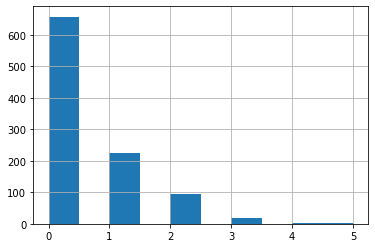

In [28]:
df['number_of_children'].hist()

Есть чуть приятнее гистограмма в seaborn

In [29]:
import seaborn as sns

<AxesSubplot:xlabel='number_of_children', ylabel='Count'>

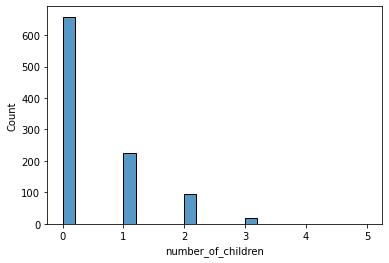

In [30]:
sns.histplot(df['number_of_children'])

In [ ]:
Пробуем посмотреть не в кол-ве, а в %

<AxesSubplot:xlabel='number_of_children', ylabel='Probability'>

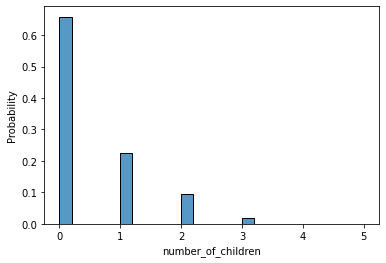

In [31]:
sns.histplot(df['number_of_children'],stat='probability')

In [32]:
df['age'].value_counts()

42.772420    1
29.524914    1
23.576408    1
40.563444    1
41.557756    1
            ..
63.789406    1
27.576455    1
28.502233    1
30.699148    1
46.662848    1
Name: age, Length: 1000, dtype: int64

Проблема - не группируется возраст из-за уникальности (округление), попробуем прикинуть знакомой гистограммой  

<AxesSubplot:xlabel='age', ylabel='Count'>

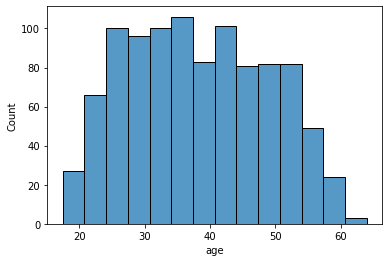

In [33]:
sns.histplot(df['age'])

In [35]:
df['age_bin'] = pd.cut(df['age'],10)

In [37]:
df.groupby('age_bin')['age'].count()

age_bin
(17.402, 22.107]     49
(22.107, 26.766]    124
(26.766, 31.425]    140
(31.425, 36.084]    134
(36.084, 40.743]    131
(40.743, 45.401]    141
(45.401, 50.06]     101
(50.06, 54.719]     121
(54.719, 59.378]     50
(59.378, 64.037]      9
Name: age, dtype: int64

(разделили на 10 групп по возрасту и сохранили это в 'age_bin')

# Среднее

In [39]:
df.head()

,age,number_of_children,income,age_bin
0,42.772420,0,34396.537188,"(40.743, 45.401]"
1,29.561090,0,183350.052521,"(26.766, 31.425]"
2,54.380735,0,53689.856555,"(50.06, 54.719]"
3,42.551689,0,109080.913926,"(40.743, 45.401]"
4,38.713080,0,153612.343419,"(36.084, 40.743]"


In [40]:
df['number_of_children'].mean()

0.483

*когда считаем среднее - 0.5 ребенка это не уголовное преступление, идем дальше

In [41]:
df['age'].mean()

38.31925590719964

Можем сразу по всем столбикам увидеть среднюю (помним что Среднее это просто сумма)

In [48]:
df.mean()

C:\Users\Ilya\AppData\Local\Temp/ipykernel_12596/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


age                       38.319256
number_of_children         0.483000
income                129415.746378
dtype: float64

Понимаем что df.mean() работает только со столбцами, которые содержат числа, корректируем

In [49]:
print(df.mean(numeric_only=True))

age                       38.319256
number_of_children         0.483000
income                129415.746378
dtype: float64


Для удобства можем переименовать и найти среднюю зп

In [55]:
salary = df['income']

In [56]:
salary.mean()

129415.7463784342

<AxesSubplot:>

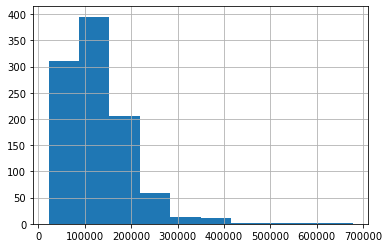

In [57]:
salary.hist()

Далее можем найти медиану (середину ряда зарплат)

In [58]:
salary.median()

114586.57093898312

In [60]:
salary.sort_values()

114     21943.855414
48      26320.953693
14      27301.351517
15      29523.164624
358     29712.057360
           ...      
909    428777.784061
248    491195.235363
946    545111.059268
520    554169.647700
646    678006.351857
Name: income, Length: 1000, dtype: float64

In [66]:
(salary <= 114587).mean().round(1)

0.5

И так, 50% зп из выборки меньше медианы, окей.
Теперь посмотрим моду

In [67]:
df['number_of_children'].mode()

0    0
dtype: int64

Вывод: модно не иметь детей, отлично
Моду по возрасту так не сможем найти т.к. значения в виде %%.%%%% (ориентируемся на гистрограмму)

In [72]:
df['age'].mode()

0      17.448452
1      17.945699
2      18.221844
3      18.245730
4      18.327301
         ...    
995    60.340166
996    60.649527
997    61.924505
998    63.789406
999    64.036559
Length: 1000, dtype: float64

<AxesSubplot:>

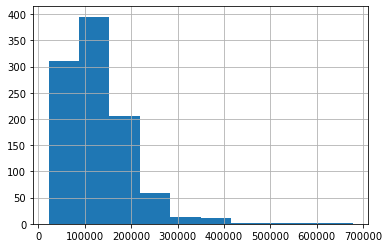

In [73]:
df['income'].hist()

In [74]:
df['income'] < 114587

0       True
1      False
2       True
3       True
4      False
       ...  
995    False
996     True
997    False
998    False
999    False
Name: income, Length: 1000, dtype: bool

In [75]:
(df['income'] < 114587).mean()

0.5

Что произошло? Мы руками отсортировали id, которые ниже медианы в 114'587 руб.
Далее нашли их %
(Пользуемся тем, что True = 1 
                     False = 0
                     )

In [78]:
False + True

1

In [79]:
False + False

0

In [80]:
(df['income'] < 100000).mean()

0.397

И так, переходим к терминам:
Квантиль 0,4 = значение которое отсекает 40% выборки
Процентиль = Процентиль * 100
Квартиль (четверти квантилей = 0.25;0.5;0.75)

In [83]:
df['income'].quantile(0.1)

58377.17440989983

У 10% зарплата меньше чем 58к

In [85]:
 df['pct'] = df['age'].rank(pct=True)

In [86]:
df.head()

,age,number_of_children,income,age_bin,pct
0,42.772420,0,34396.537188,"(40.743, 45.401]",0.639
1,29.561090,0,183350.052521,"(26.766, 31.425]",0.257
2,54.380735,0,53689.856555,"(50.06, 54.719]",0.936
3,42.551689,0,109080.913926,"(40.743, 45.401]",0.634
4,38.713080,0,153612.343419,"(36.084, 40.743]",0.521


In [87]:
(df['age'] < 42.77242).mean()

0.638

Seems legit, mkay

# Boxplot aka коробка с усами

<AxesSubplot:>

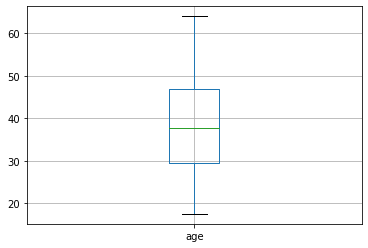

In [88]:
df.boxplot('age')

Межквартильный размах - расстояние между 1 и 3 квартилем
Боксплоты удобные для симметричных распределений, сейчас убедимся

<AxesSubplot:>

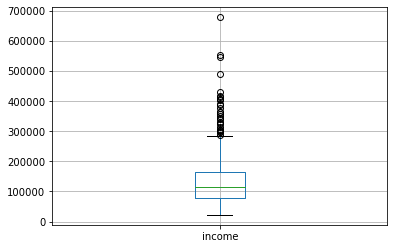

In [89]:
df.boxplot('income')

Убедились, а ещё можно перевернуть боксплот ( sns.boxplot(df['income']) )

In [96]:
df['income'].describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

std - Стандартное отклонение (в практике ваще не нужно, используем вместо него MinAbsoluteDeviation)
HowToCalculate? Берем среднее и считаем отклонение каждого значения от среднего

In [97]:
df['income'].mean()

129415.7463784342

<AxesSubplot:>

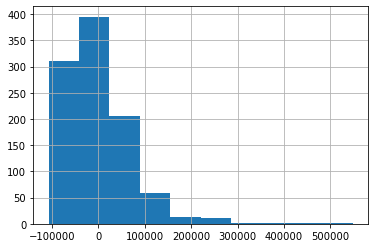

In [100]:
(df['income'] - df['income'].mean()).hist()

In [104]:
(df['income'] - df['income'].mean()).abs().mean()

51910.29730549477

In [106]:
df[['income','age']].corr()

,income,age
income,1.000000,-0.048164
age,-0.048164,1.000000


Корреляция между доходом и возрастом практически 0, и нам эта цифра ни о чем не говорит
Если есть набор линейно связанных переменных и нужно найти самую сильную взаимосвязь - рисуем корреляцию, в остальном - нет 
Попробуем посмотреть на сводник

<AxesSubplot:xlabel='age_bin'>

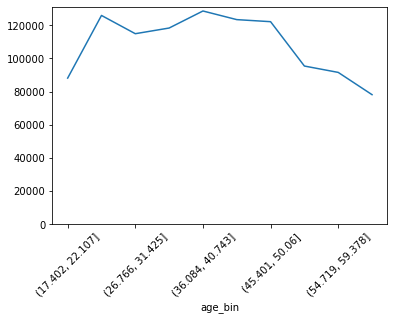

In [111]:
df.groupby('age_bin')['income'].median().plot(rot=45, ylim=0)

<AxesSubplot:xlabel='age'>

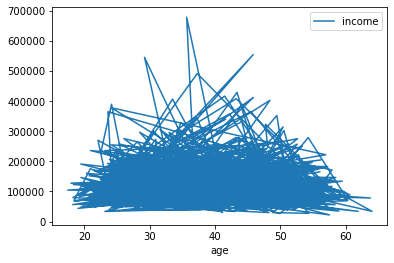

In [112]:
df.plot(x='age', y='income')

In [ ]:
(делаем scatter)

<AxesSubplot:xlabel='age', ylabel='income'>

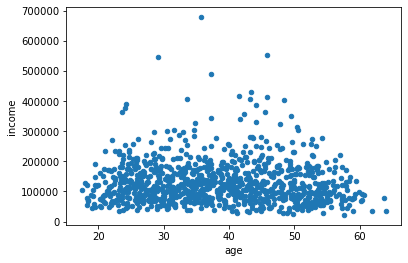

In [113]:
df.plot(x='age', y='income',kind='scatter')